In [1]:
### atomization energy for HEAT and W4-MR
import numpy as np

atoms = '''
# atom     FCI      AFQMC/CCSD_PT    ERROR     AFQMC/CCSD_PT2   ERROR       AFQMC/CISD    ERROR      AFQMC/HF    ERROR       CCSD(T)
    H   -0.499278
    B   -24.58976   -24.589893     0.000006     -24.589893    0.000006     -24.58955    0.00002     -24.5844	0.0002	    -24.58939
    C   -37.76066   -37.760544     0.000004     -37.760543    0.000004     -37.76036    0.00002     -37.7560	0.0002	    -37.76032
    N   -54.47855   -54.478358     0.000002     -54.478366    0.000002     -54.47836    0.00001     -54.4778	0.0001	    -54.47838
    O   -74.91006   -74.909949     0.000004     -74.909932    0.000004     -74.90990	 0.00002     -74.9075	0.0002	    -74.90987
    F   -99.52774   -99.527678     0.000009     -99.527673    0.000010     -99.52766	 0.00003     -99.5261	0.0002	    -99.52754
    Cl  -459.5992   -459.59909     0.000008     -459.59906    0.000010     -459.598984  0.000009     0.000000   0.0000      -459.59889
    S   -397.6009   -397.60083     0.000005     -397.60083    0.000005     -397.600627  0.000009    0.000000    0.0000      -397.60055
'''

my_bb_data = '''
#   Mol          CCSD(T)              AFQMC/CCSD_PT                  AFQMC/CCSD_PT2
# HEAT 
    C2H       -76.39855638        -76.399014 +/- 0.000051       -76.399562 +/- 0.000058
    C2H2      -77.10924902        -77.109546 +/- 0.000064       -77.109680 +/- 0.000115
    CF        -137.4748482        -137.475760 +/- 0.000192      -137.475671 +/- 0.000156
    CH        -38.37935551        -38.380189 +/- 0.000024       -38.379985 +/- 0.000011
    CH2       -39.04119570        -39.041474 +/- 0.000006       -39.041480 +/- 0.000007
    CH3       -39.71553966        -39.715980 +/- 0.000010       -39.715982 +/- 0.000011
    CN        -92.48869527        -92.487483 +/- 0.000157       -92.490868 +/- 0.000417
    CO        -113.0544306        -113.055092 +/- 0.000092      -113.054777 +/- 0.000109
    CO2       -188.1474293        -188.148924 +/- 0.000137      -188.148620 +/- 0.000120
    F2        -199.0963839        -199.098269 +/- 0.000057      -199.098891 +/- 0.000077
    H2        -1.163426264        -1.163426 +/- 0.000001         -1.163423 +/- 0.000001
    H2O       -76.24101779        -76.241701 +/- 0.000038       -76.241738 +/- 0.000062
    H2O2      -151.1936301        -151.194724 +/- 0.000058      -151.194733 +/- 0.000060
    HCN       -93.18832063        -93.189107 +/- 0.000157       -93.188920 +/- 0.000157
    HCO       -113.5757054        -113.576087 +/- 0.000097      -113.575954 +/- 0.000145
    HF        -100.2281312        -100.228669 +/- 0.000031      -100.228645 +/- 0.000032
    HNO       -130.1696778        -130.172789 +/- 0.000079      -130.172245 +/- 0.000218
    HO2       -150.5584809        -150.559452 +/- 0.000056      -150.559348 +/- 0.000056
    N2        -109.2752986        -109.276029 +/- 0.000140      -109.275833 +/- 0.000121
    NH        -55.09129056        -55.091499 +/- 0.000007       -55.091517 +/- 0.000018
    NH2       -55.73250631        -55.732956 +/- 0.000013       -55.732938 +/- 0.000013
    NH3       -56.40191327        -56.402489 +/- 0.000029       -56.402502 +/- 0.000031
    NO        -129.5977782        -129.598245 +/- 0.000077      -129.597858 +/- 0.000095
    O2        -149.9856842        -149.985698 +/- 0.000084      -149.985707 +/- 0.000076
    OF        -174.4979237        -174.498355 +/- 0.000059      -174.498380 +/- 0.000174
    OH        -75.55923331        -75.559572 +/- 0.000015       -75.559586 +/- 0.000016
# WR-MR
    B2        -49.27052714	      -49.270414 +/- 0.000068       -49.271836 +/- 0.000072
    BN        -79.20597437	      -79.197485 +/- 0.000154       -79.202281 +/- 0.000168
    C2        -75.72647775	      -75.716958 +/- 0.000121       -75.725098 +/- 0.000155
  Cl2O        -994.2163018	      -994.217511 +/- 0.000106      -994.217741 +/- 0.000106
  ClF3        -758.2800536	      -758.282142 +/- 0.000145      -758.281907 +/- 0.000168
  ClF5        -957.35520	        -957.358852 +/- 0.000267      -957.358593 +/- 0.000292
  ClO3        -684.41612	        -684.418089 +/- 0.000190      -684.417725 +/- 0.000218
  ClOO        -609.57907	        -609.582523 +/- 0.000140      -609.584393 +/- 0.000142
ClOOCl        -1069.18631	        -1069.188568 +/- 0.000157     -1069.188608 +/- 0.000209
   F2O        -274.0716236	      -274.073272 +/- 0.000167      -274.072819 +/- 0.000153
   FO2        -249.51577	        -249.516703 +/- 0.000149      -249.520278 +/- 0.000155 
  FOOF        -349.05618	        -349.058586 +/- 0.000183      -349.060961 +/- 0.000178
    O3        -224.909286 	      -224.909732 +/- 0.000131      -224.912691 +/- 0.000149
  OClO        -609.5055511	      -609.505975 +/- 0.000156      -609.506599 +/- 0.000154
    OF        -174.4980385	      -174.498553 +/- 0.000094      -174.498252 +/- 0.000099
    S3        -1192.993221	      -1192.994886 +/- 0.000090     -1192.995642 +/- 0.000084
    S4        -1590.67082	        -1590.675491 +/- 0.000126     -1590.676467 +/- 0.000163
'''

In [2]:
ref_w4_data = '''
#    mol     CCSD(T)        AFQMC/CISD          CCSDT             REF             AFQMC/HF
    B2    -49.27052714	-49.2703    0.0001	  -49.27227087	  -49.27384491    -49.2657    0.0003    
    BN    -79.20597437	-79.2016	  0.0003	  -79.20331193	  -79.20554682    -79.2030    0.0007 
    C2    -75.72647775	-75.7239	  0.0002	  -75.72512044	  -75.72771005    -75.7320    0.0006    
  Cl2O    -994.2163018	-994.2181	  0.0001	  -994.21674      -994.2184489    -994.2192   0.0003
  ClF3    -758.2800536	-758.2834 	0.0002	  -758.2808	      -758.283304     -758.2896   0.0004
  ClF5    -957.35520	  -957.3607	  0.0003    -957.35607      -957.36014      -957.36640	0.0005
  ClO3    -684.41612	  -684.4175	  0.0002    -684.41624      -684.41830      -684.41730	0.0004
  ClOO    -609.57907	  -609.5844	  0.0002    -609.58164      -609.58568      -609.58540	0.0003
ClOOCl    -1069.18631	  -1069.1891	0.0002    -1069.18686     -1069.18970     -1069.19200 0.0004
   F2O    -274.0716236	-274.0736	  0.0002	  -274.0721846	  -274.0745163    -274.0754	  0.0004
   FO2    -249.51577	  -249.5208	  0.0003    -249.51757      -249.52168      -249.52380	0.0003
  FOOF    -349.05618	  -349.0601	  0.0003    -349.05729      -349.06210      -349.06230	0.0003
    O3    -224.909286 	-224.9128	  0.0003	  -224.9094075	  -224.9147591    -224.91580	0.0003
  OClO    -609.5055511	-609.5073	  0.0003	  -609.50591      -609.5086808    -609.5099	  0.0004
    OF    -174.4980385	-174.49914	0.00009	  -174.4991431	  -174.5001424    -174.5005	  0.0002
    S3    -1192.993221	-1192.9958	0.0002	  -1192.9942896	  -1192.996996    -1192.9958	0.0002
    S4    -1590.67082	  -1590.6767	0.0003    -1590.67150     -1590.67690     -1590.67840 0.0003
'''

my_w4_data = '''
# mol       AFQMC/CCSD_PT               AFQMC/CCSD_PT2                     AFQMC/CISD               CCSD(T)
B2        -49.270414 +/- 0.000068     -49.271836 +/- 0.000072       -49.270451 +/- 0.000076     -49.265666541016365
BN        -79.197485 +/- 0.000154     -79.202281 +/- 0.000168       -79.200676 +/- 0.000154     -79.19262599723706
C2        -75.716958 +/- 0.000121     -75.725098 +/- 0.000155       -75.723083 +/- 0.000136     -75.71292506489533  
Cl2O      -994.217511 +/- 0.000106    -994.217741 +/- 0.000106      -994.217896 +/- 0.000097    -994.2163017704316
ClF3      -758.282142 +/- 0.000145    -758.281907 +/- 0.000168      -758.283508 +/- 0.000131    -758.2800536548064
ClF5      -957.358852 +/- 0.000267    -957.358593 +/- 0.000292      -957.359863 +/- 0.000228    -957.3551963604212
ClO3      -684.418089 +/- 0.000190    -684.417725 +/- 0.000218      -684.418213 +/- 0.000186    -684.4160044006004
ClOO      -609.582523 +/- 0.000140    -609.584393 +/- 0.000142      -609.584656 +/- 0.000162    -609.5749075087567
ClOOCl    -1069.188568 +/- 0.000157   -1069.188608 +/- 0.000209     -1069.188965 +/- 0.000163   -1069.1863125352806
F2O       -274.073272 +/- 0.000167    -274.072819 +/- 0.000153      -274.073914 +/- 0.000133    -274.071275006352
FO2       -249.516703 +/- 0.000149    -249.520278 +/- 0.000155      -249.520584 +/- 0.000187    -249.5103566937451
FOOF      -349.058586 +/- 0.000183    -349.060961 +/- 0.000178      -349.060577 +/- 0.000241    -349.04896333381424
O3        -224.909732 +/- 0.000131    -224.912691 +/- 0.000149      -224.912857 +/- 0.000198    -224.90084502686867
OClO      -609.505975 +/- 0.000156    -609.506599 +/- 0.000154      -609.507202 +/- 0.000135    -609.5048666591367
OF        -174.498553 +/- 0.000094    -174.498252 +/- 0.000099      -174.499222 +/- 0.000077    -174.49800453015396
S3        -1192.994886 +/- 0.000090   -1192.995642 +/- 0.000084     -1192.995361 +/- 0.000151   -1192.9877047726454
S4        -1590.675491 +/- 0.000126   -1590.676467 +/- 0.000163     -1590.676025 +/- 0.000182   -1590.6652140436447
'''

In [3]:
data_dic = {}
for line in my_bb_data.splitlines():
    if not line.startswith('#'):
        if len(line) > 0 :
            mol = line.split()[0]
            ccsd_t = line.split()[1]
            afqmc_ccsd_pt = line.split()[2]
            afqmc_ccsd_pt_err = line.split()[4]
            afqmc_ccsd_pt2 = line.split()[5]
            afqmc_ccsd_pt2_err = line.split()[7]
            data_dic[mol] = {}
            data_dic[mol]["ccsd_t"] = float(ccsd_t)
            data_dic[mol]["afqmc_ccsd_pt"] = float(afqmc_ccsd_pt)
            data_dic[mol]["afqmc_ccsd_pt_err"] = float(afqmc_ccsd_pt_err)
            data_dic[mol]["afqmc_ccsd_pt2"] = float(afqmc_ccsd_pt2)
            data_dic[mol]["afqmc_ccsd_pt2_err"] = float(afqmc_ccsd_pt2_err)

In [4]:
heat_mols = ["H2","CH","CH2","NH","CH3","NH2","OH","HF",
        "H2O","NH3","C2H","CN","C2H2","CO","HCN","N2",
        "HCO","CF","NO","HNO","O2","HO2","OF","H2O2","F2","CO2"]
with open("../../afqmc_cisd_data/heat/ene.dz.txt") as f:
    for line in f:
        parts = line.split()
        species = parts[0]
        if species in heat_mols:
        # data_dic[species]["ccsdt"] = float(parts[1])
        # data_dic[species]["ccsdt[q]"] = float(parts[2])
        # data_dic[species]["ccsdt(q)"] = float(parts[3])
        # data_dic[species]["ccsdtq"] = float(parts[4])
            data_dic[species]["ref"] = float(parts[5])

In [5]:
# ref = np.array([data_dic[mol]["ccsdtqp"] for mol in heat_mols])
data = np.loadtxt("../../afqmc_cisd_data/heat/ene.txt", delimiter=",")
afqmc_cisd = (data[:, 5])
afqmc_cisd_stoc_err = data[:, 6]

for i,mol in enumerate(heat_mols):
    data_dic[mol]["afqmc_cisd"] = float(afqmc_cisd[i])
    data_dic[mol]["afqmc_cisd_err"] = float(afqmc_cisd_stoc_err[i])

w4mr_mols = []
for line in ref_w4_data.splitlines():
    if not line.startswith('#'):
        if len(line) > 0 :
            parts = line.split()
            mol = parts[0]
            w4mr_mols = np.hstack((w4mr_mols,mol))
            data_dic[mol]['ref'] = float(parts[5])
            data_dic[mol]['afqmc_cisd'] = float(parts[2])
            data_dic[mol]['afqmc_cisd_err'] = float(parts[3])

In [6]:
atom_energy = {}
for line in atoms.splitlines():
    if not line.startswith('#'):
        if len(line) > 0 :
            parts = line.split()
            atom = parts[0]
            atom_energy[atom] = {}
            if "H" not in atom:
                atom_energy[atom]["fci"] = float(parts[1])
                atom_energy[atom]["afqmc_ccsd_pt"] = float(parts[2])
                atom_energy[atom]["afqmc_ccsd_pt_err"] = float(parts[3])
                atom_energy[atom]["afqmc_ccsd_pt2"] = float(parts[4])
                atom_energy[atom]["afqmc_ccsd_pt2_err"] = float(parts[5])
                atom_energy[atom]["afqmc_cisd"] = float(parts[6])
                atom_energy[atom]["afqmc_cisd_err"] = float(parts[7])
                atom_energy[atom]["ccsd_t"] = float(parts[10])
atom_energy["H"] = -0.499278403419583

In [7]:
import re

def parse_formula(formula):
    pattern = r"([A-Z][a-z]?)(\d*)"
    counts = {}
    for (element, count) in re.findall(pattern, formula):
        count = int(count) if count else 1
        counts[element] = counts.get(element, 0) + count
    return counts

In [8]:
np.hstack((heat_mols,w4mr_mols))

array(['H2', 'CH', 'CH2', 'NH', 'CH3', 'NH2', 'OH', 'HF', 'H2O', 'NH3',
       'C2H', 'CN', 'C2H2', 'CO', 'HCN', 'N2', 'HCO', 'CF', 'NO', 'HNO',
       'O2', 'HO2', 'OF', 'H2O2', 'F2', 'CO2', 'B2', 'BN', 'C2', 'Cl2O',
       'ClF3', 'ClF5', 'ClO3', 'ClOO', 'ClOOCl', 'F2O', 'FO2', 'FOOF',
       'O3', 'OClO', 'OF', 'S3', 'S4'], dtype='<U32')

In [9]:
sum_atom_energy = {}
for mol in np.hstack((heat_mols,w4mr_mols)):
    sum_atom_energy[mol] = {}
    formula = parse_formula(mol)
    energy = 0
    err2 = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += atom_energy[atom]* count
        else:
            energy += atom_energy[atom]["fci"] * count
    sum_atom_energy[mol]['ref'] = energy
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += atom_energy[atom]* count
        else:
            energy += atom_energy[atom]["afqmc_cisd"] * count
            err2 += atom_energy[atom]["afqmc_cisd_err"]**2 * count
    sum_atom_energy[mol]['afqmc_cisd'] = energy
    sum_atom_energy[mol]['afqmc_cisd_err'] = np.sqrt(err2)
    err2 = 0
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += atom_energy[atom]* count
        else:
            energy += atom_energy[atom]["afqmc_ccsd_pt"] * count
            err2 += atom_energy[atom]["afqmc_ccsd_pt_err"]**2 * count
    sum_atom_energy[mol]['afqmc_ccsd_pt'] = energy
    sum_atom_energy[mol]['afqmc_ccsd_pt_err'] = np.sqrt(err2)
    err2 = 0
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += atom_energy[atom]* count
        else:
            energy += atom_energy[atom]["afqmc_ccsd_pt2"] * count
            err2 += atom_energy[atom]["afqmc_ccsd_pt2_err"]**2 * count
    sum_atom_energy[mol]['afqmc_ccsd_pt2'] = energy
    sum_atom_energy[mol]['afqmc_ccsd_pt2_err'] = np.sqrt(err2)
    err2 = 0
    energy = 0
    for atom,count in formula.items():
        if "H" == atom:
            energy += atom_energy[atom]* count
        else:
            energy += atom_energy[atom]["ccsd_t"] * count
    sum_atom_energy[mol]['ccsd_t'] = energy

In [16]:
ccsd_t = []
ref = []
afqmc_hf = []
afqmc_hf_err = []
afqmc_cisd = []
afqmc_cisd_err = []
afqmc_ccpt = []
afqmc_ccpt_err = []
afqmc_ccpt2 = []
afqmc_ccpt2_err = []
for mol in heat_mols:
    ccsd_t = np.hstack((ccsd_t,sum_atom_energy[mol]['ccsd_t']-data_dic[mol]['ccsd_t']))
    ref = np.hstack((ref,sum_atom_energy[mol]['ref']-data_dic[mol]['ref']))
    afqmc_cisd = np.hstack((afqmc_cisd,sum_atom_energy[mol]['afqmc_cisd']-data_dic[mol]['afqmc_cisd']))
    afqmc_ccpt = np.hstack((afqmc_ccpt,sum_atom_energy[mol]['afqmc_ccsd_pt']-data_dic[mol]['afqmc_ccsd_pt']))
    afqmc_ccpt2 = np.hstack((afqmc_ccpt2,sum_atom_energy[mol]['afqmc_ccsd_pt2']-data_dic[mol]['afqmc_ccsd_pt2']))
    afqmc_cisd_err = np.hstack((afqmc_cisd_err,sum_atom_energy[mol]['afqmc_cisd_err']**2+data_dic[mol]['afqmc_cisd_err']**2))
    afqmc_ccpt_err = np.hstack((afqmc_ccpt_err,sum_atom_energy[mol]['afqmc_ccsd_pt_err']**2+data_dic[mol]['afqmc_ccsd_pt_err']**2))
    afqmc_ccpt2_err = np.hstack((afqmc_ccpt2_err,sum_atom_energy[mol]['afqmc_ccsd_pt2_err']**2+data_dic[mol]['afqmc_ccsd_pt2_err']**2))

afqmc_cisd_err = np.sqrt(afqmc_cisd_err)
afqmc_ccpt_err = np.sqrt(afqmc_ccpt_err)
afqmc_ccpt2_err = np.sqrt(afqmc_ccpt2_err)

In [17]:
afqmc_ccpt

array([0.16486919, 0.1203666 , 0.28237319, 0.1138626 , 0.45760079,
       0.25604119, 0.1503446 , 0.2017126 , 0.33319519, 0.42629579,
       0.3786476 , 0.248581  , 0.58990119, 0.384599  , 0.4509266 ,
       0.319313  , 0.4063156 , 0.187538  , 0.209938  , 0.2852036 ,
       0.1658    , 0.2402756 , 0.060926  , 0.37626919, 0.042913  ,
       0.568482  ])

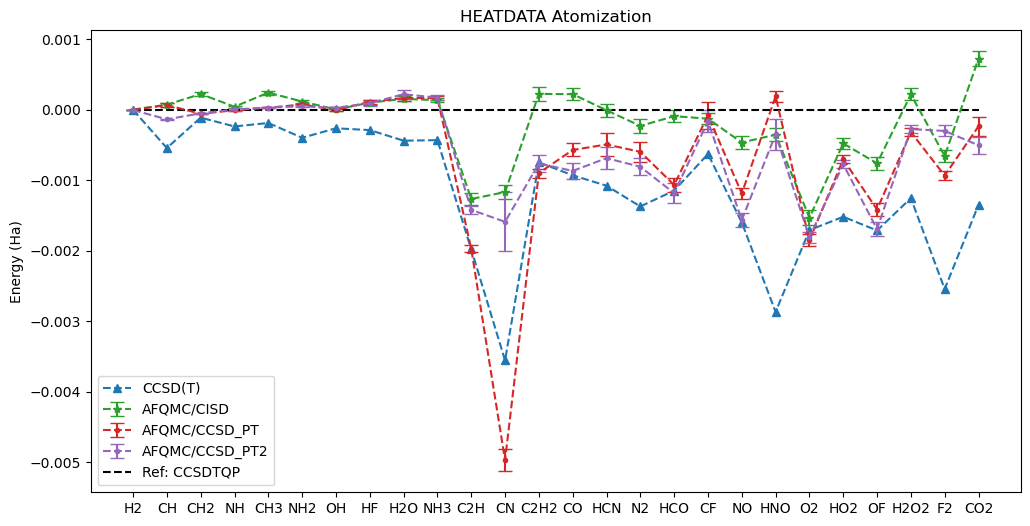

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(heat_mols,ccsd_t-ref,'^--',color='C0',label='CCSD(T)')
# plt.errorbar(heat_mols, afqmc_hf-ref, yerr=afqmc_hf_err, fmt='x--', color='C1', capsize=5, label='AFQMC/HF')
plt.errorbar(heat_mols, afqmc_cisd-ref, yerr=afqmc_cisd_err,fmt='*--',color='C2', capsize=5, label='AFQMC/CISD')
plt.errorbar(heat_mols, afqmc_ccpt-ref, yerr=afqmc_ccpt_err, fmt='.--', color='C3', capsize=5, label='AFQMC/CCSD_PT')
plt.errorbar(heat_mols, afqmc_ccpt2-ref, yerr=afqmc_ccpt2_err, fmt='.--', color='C4', capsize=5, label='AFQMC/CCSD_PT2')
plt.plot(heat_mols,[0]*len(heat_mols),'--',color='black',label='Ref: CCSDTQP')
plt.ylabel('Energy (Ha)')
plt.title('HEATDATA Atomization')
handles, labels = plt.gca().get_legend_handles_labels()
order = ['CCSD(T)', 'AFQMC/CISD', 'AFQMC/CCSD_PT', 'AFQMC/CCSD_PT2', 'Ref: CCSDTQP']
ordered_handles = [handles[labels.index(l)] for l in order]
ordered_labels = order
plt.legend(ordered_handles, ordered_labels,loc='lower left')
plt.show()

In [22]:
n_mol = len(heat_mols)
ccsd_t_msd = np.sqrt(np.sum((ccsd_t-ref)**2)/n_mol)*1000
afqmc_cisd_msd = np.sqrt(np.sum((afqmc_cisd-ref)**2)/n_mol)*1000
afqmc_ccsd_pt_msd = np.sqrt(np.sum((afqmc_ccpt-ref)**2)/n_mol)*1000
afqmc_ccsd_pt2_msd = np.sqrt(np.sum((afqmc_ccpt2-ref)**2)/n_mol)*1000
# afqmc_hf_msd_err = np.sqrt(sum(afqmc_hf_err**2)/n_mol)*1000
afqmc_cisd_msd_err = np.sqrt(sum(afqmc_cisd_err**2)/n_mol)*1000
afqmc_ccsd_pt_msd_err = np.sqrt(sum(afqmc_ccpt_err**2)/n_mol)*1000
afqmc_ccsd_pt2_msd_err = np.sqrt(sum(afqmc_ccpt2_err**2)/n_mol)*1000
print('HEAT DATA ')
print(f'CCSD(T) RMSD from Ref {ccsd_t_msd:.2f} mHa')
# print(f'AFQMC/HF RMSD from Ref {afqmc_hf_msd:.2f} +/- {afqmc_hf_msd_err:.2f} mHa')
print(f'AFQMC/CISD RMSD from Ref {afqmc_cisd_msd:.2f} +/- {afqmc_cisd_msd_err:.2f}  mHa')
print(f'AFQMC/CCSD_PT RMSD from Ref {afqmc_ccsd_pt_msd:.2f} +/- {afqmc_ccsd_pt_msd_err:.2f} mHa')
print(f'AFQMC/CCSD_PT2 RMSD from Ref {afqmc_ccsd_pt2_msd:.2f} +/- {afqmc_ccsd_pt2_msd_err:.2f} mHa')

HEAT DATA 
CCSD(T) RMSD from Ref 1.42 mHa
AFQMC/CISD RMSD from Ref 0.55 +/- 0.07  mHa
AFQMC/CCSD_PT RMSD from Ref 1.24 +/- 0.09 mHa
AFQMC/CCSD_PT2 RMSD from Ref 0.84 +/- 0.12 mHa


In [23]:
ccsd_t = []
ref = []
afqmc_hf = []
afqmc_hf_err = []
afqmc_cisd = []
afqmc_cisd_err = []
afqmc_ccpt = []
afqmc_ccpt_err = []
afqmc_ccpt2 = []
afqmc_ccpt2_err = []
for mol in w4mr_mols:
    ccsd_t = np.hstack((ccsd_t,sum_atom_energy[mol]['ccsd_t']-data_dic[mol]['ccsd_t']))
    ref = np.hstack((ref,sum_atom_energy[mol]['ref']-data_dic[mol]['ref']))
    afqmc_cisd = np.hstack((afqmc_cisd,sum_atom_energy[mol]['afqmc_cisd']-data_dic[mol]['afqmc_cisd']))
    afqmc_ccpt = np.hstack((afqmc_ccpt,sum_atom_energy[mol]['afqmc_ccsd_pt']-data_dic[mol]['afqmc_ccsd_pt']))
    afqmc_ccpt2 = np.hstack((afqmc_ccpt2,sum_atom_energy[mol]['afqmc_ccsd_pt2']-data_dic[mol]['afqmc_ccsd_pt2']))
    afqmc_cisd_err = np.hstack((afqmc_cisd_err,sum_atom_energy[mol]['afqmc_cisd_err']**2+data_dic[mol]['afqmc_cisd_err']**2))
    afqmc_ccpt_err = np.hstack((afqmc_ccpt_err,sum_atom_energy[mol]['afqmc_ccsd_pt_err']**2+data_dic[mol]['afqmc_ccsd_pt_err']**2))
    afqmc_ccpt2_err = np.hstack((afqmc_ccpt2_err,sum_atom_energy[mol]['afqmc_ccsd_pt2_err']**2+data_dic[mol]['afqmc_ccsd_pt2_err']**2))

afqmc_cisd_err = np.sqrt(afqmc_cisd_err)
afqmc_ccpt_err = np.sqrt(afqmc_ccpt_err)
afqmc_ccpt2_err = np.sqrt(afqmc_ccpt2_err)

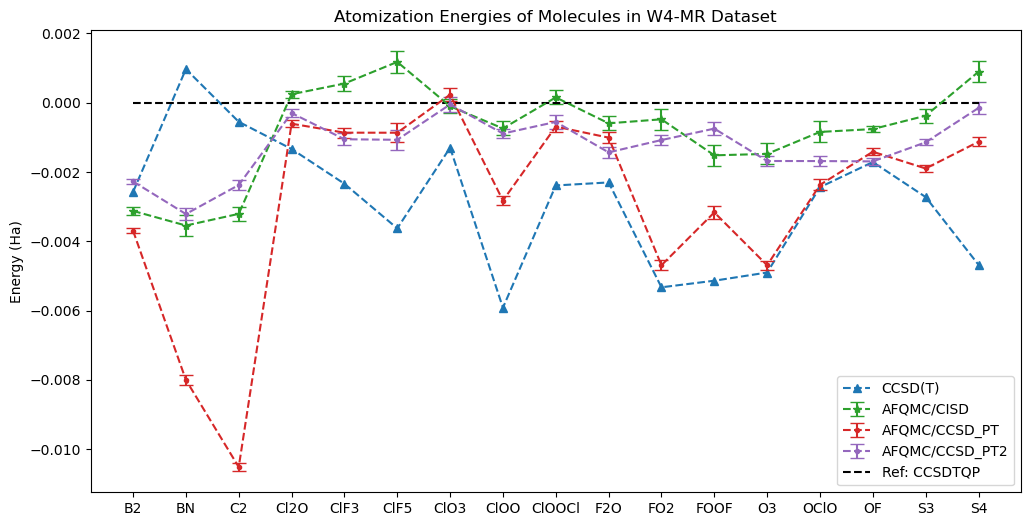

In [28]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(w4mr_mols,ccsd_t-ref,'^--',color='C0',label='CCSD(T)')
# plt.errorbar(heat_mols, afqmc_hf-ref, yerr=afqmc_hf_err, fmt='x--', color='C1', capsize=5, label='AFQMC/HF')
plt.errorbar(w4mr_mols, afqmc_cisd-ref, yerr=afqmc_cisd_err,fmt='*--',color='C2', capsize=5, label='AFQMC/CISD')
plt.errorbar(w4mr_mols, afqmc_ccpt-ref, yerr=afqmc_ccpt_err, fmt='.--', color='C3', capsize=5, label='AFQMC/CCSD_PT')
plt.errorbar(w4mr_mols, afqmc_ccpt2-ref, yerr=afqmc_ccpt2_err, fmt='.--', color='C4', capsize=5, label='AFQMC/CCSD_PT2')
plt.plot(w4mr_mols,[0]*len(w4mr_mols),'--',color='black',label='Ref: CCSDTQP')
plt.ylabel('Energy (Ha)')
plt.title('Atomization Energies of Molecules in W4-MR Dataset')
handles, labels = plt.gca().get_legend_handles_labels()
order = ['CCSD(T)', 'AFQMC/CISD', 'AFQMC/CCSD_PT', 'AFQMC/CCSD_PT2', 'Ref: CCSDTQP']
ordered_handles = [handles[labels.index(l)] for l in order]
ordered_labels = order
plt.legend(ordered_handles, ordered_labels,loc='lower right')
plt.show()

In [29]:
n_mol = len(w4mr_mols)
ccsd_t_msd = np.sqrt(np.sum((ccsd_t-ref)**2)/n_mol)*1000
afqmc_cisd_msd = np.sqrt(np.sum((afqmc_cisd-ref)**2)/n_mol)*1000
afqmc_ccsd_pt_msd = np.sqrt(np.sum((afqmc_ccpt-ref)**2)/n_mol)*1000
afqmc_ccsd_pt2_msd = np.sqrt(np.sum((afqmc_ccpt2-ref)**2)/n_mol)*1000
# afqmc_hf_msd_err = np.sqrt(sum(afqmc_hf_err**2)/n_mol)*1000
afqmc_cisd_msd_err = np.sqrt(sum(afqmc_cisd_err**2)/n_mol)*1000
afqmc_ccsd_pt_msd_err = np.sqrt(sum(afqmc_ccpt_err**2)/n_mol)*1000
afqmc_ccsd_pt2_msd_err = np.sqrt(sum(afqmc_ccpt2_err**2)/n_mol)*1000
print('W4MR DATA ')
print(f'CCSD(T) RMSD from Ref {ccsd_t_msd:.2f} mHa')
# print(f'AFQMC/HF RMSD from Ref {afqmc_hf_msd:.2f} +/- {afqmc_hf_msd_err:.2f} mHa')
print(f'AFQMC/CISD RMSD from Ref {afqmc_cisd_msd:.2f} +/- {afqmc_cisd_msd_err:.2f}  mHa')
print(f'AFQMC/CCSD_PT RMSD from Ref {afqmc_ccsd_pt_msd:.2f} +/- {afqmc_ccsd_pt_msd_err:.2f} mHa')
print(f'AFQMC/CCSD_PT2 RMSD from Ref {afqmc_ccsd_pt2_msd:.2f} +/- {afqmc_ccsd_pt2_msd_err:.2f} mHa')

W4MR DATA 
CCSD(T) RMSD from Ref 3.37 mHa
AFQMC/CISD RMSD from Ref 1.58 +/- 0.24  mHa
AFQMC/CCSD_PT RMSD from Ref 3.96 +/- 0.15 mHa
AFQMC/CCSD_PT2 RMSD from Ref 1.50 +/- 0.17 mHa
